# 2º Parte: Análises Descritiva.

## Contexto: Uma e-commerce, contratou um serviço de um  data scientist para gerar insights sobre suas vendas. Neste processo passou algumas perguntas que a equipe de vendas julgou pertinentes e norteadoras.

    #Q1: Qual foi o melhor mês de vendas? Quanto foi arrecadado por mês?
    #Q2: Qual a cidade com o maior número de vendas ?
    #Q3: A que horas devemos exibir o anúncio para maximizar a probabilidade de o cliente comprar o produto?
    #Q4: Quais produtos são frequentemente vendidos juntos? Quantas unidades são vendidas ?
    #Q5: Qual produto vendeu mais? Por que você acha que vendeu mais?

### Preparando as bibliotecas e carregando o banco de dados já tratado.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importando as bibliotecas matplotlib e  pandas se necessário usar o comando %pip para instalar.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Declarando o caminho
caminho = '/content/drive/MyDrive/Code/Myrep/Ecommerce/Datasets/db_r.csv'

# Criando o database
db = pd.read_csv(caminho)

# Transformar a coluna das datas em formato datetime com inferência de formato.
db['Order Date'] = pd.to_datetime(db['Order Date'], infer_datetime_format=True)

# Visualizar as primeiras linhas do DataFrame para verificar se a conversão ocorreu corretamente
db.head()


<ipython-input-5-239200529043>:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  db['Order Date'] = pd.to_datetime(db['Order Date'], infer_datetime_format=True)
<ipython-input-5-239200529043>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  db['Order Date'] = pd.to_datetime(db['Order Date'], infer_datetime_format=True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


### Q1: Qual foi o melhor mês de vendas? Quanto foi arrecadado por cada mês?

In [6]:
# Criando uma coluna para os meses.
db['Months'] = db['Order Date'].dt.month

# Para responder a segunda parte, precisamos criar a tabela com as vendas totais.
db['Total Sales'] = db['Quantity Ordered'] * db['Price Each'] # Multiplicando a quantidade pedida pelo valor de cada item.

# Agora agrupamos os dados em função dos meses e realizamos a soma das vendas de cada mês.
vendas_por_mes = db.groupby('Months')['Total Sales'].sum().reset_index() # o reset index é para organizar
# Realizando o print
print(f'As vendas de cada mês foram de  \n {vendas_por_mes}')

As vendas de cada mês foram de  
     Months  Total Sales
0        1   2286906.13
1        2   2394466.93
2        3   2793085.44
3        4   3229765.34
4        5   3033275.77
5        6   2684602.52
6        7   2721872.59
7        8   2447041.57
8        9   2413750.82
9       10   3475536.75
10      11   3086325.27
11      12   3925406.84


#### Criando uma visualização.

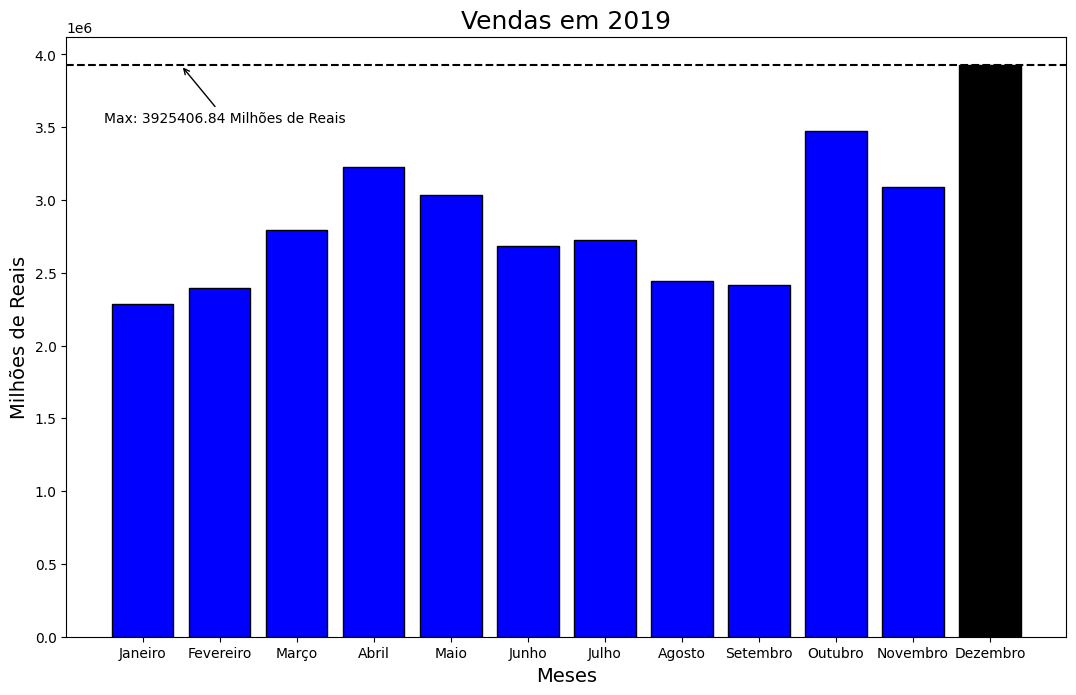

In [7]:
# Criando uma figura.
fig = plt.figure(figsize=(10,6))

# Criando os eixos.
eixo = fig.add_axes([0, 0, 1, 1])

# Declarando um eixo x
indice = range(len(vendas_por_mes['Months']))

# Criando um filtro para os meses.
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril','Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Adicionando um filtro de cores
cor = ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'black']

# Passando os dados para o gráfico. No caso declarando quem será meu x e meu y.
eixo.bar(indice, vendas_por_mes['Total Sales'], color = cor, edgecolor = 'black')

# Aplicando um eixo x mais detalhado.
eixo.set_xticks(indice)
# Aplicando o filtro dos nomes
eixo.set_xticklabels(meses)

#Configurações do gráfico.
eixo.set_title('Vendas em 2019', fontsize = 18)
eixo.set_xlabel('Meses', fontsize = 14)
eixo.set_ylabel('Milhões de Reais', fontsize = 14)

# Criando uma linha visualizadora.
eixo.axhline(max(vendas_por_mes['Total Sales']), color = 'black', ls = '--')

# Adicionando o valor máximo no eixo y como texto.
valor_maximo = max(vendas_por_mes['Total Sales'])
eixo.annotate(f'Max: {valor_maximo:.2f} Milhões de Reais', xy=(0.5, valor_maximo), xytext=(- 0.5, valor_maximo * 0.9),
              arrowprops=dict(arrowstyle='->', color='black'))

# Mostrando o gráfico.
plt.show()

### Q2: Qual a cidade com o maior número de vendas ?

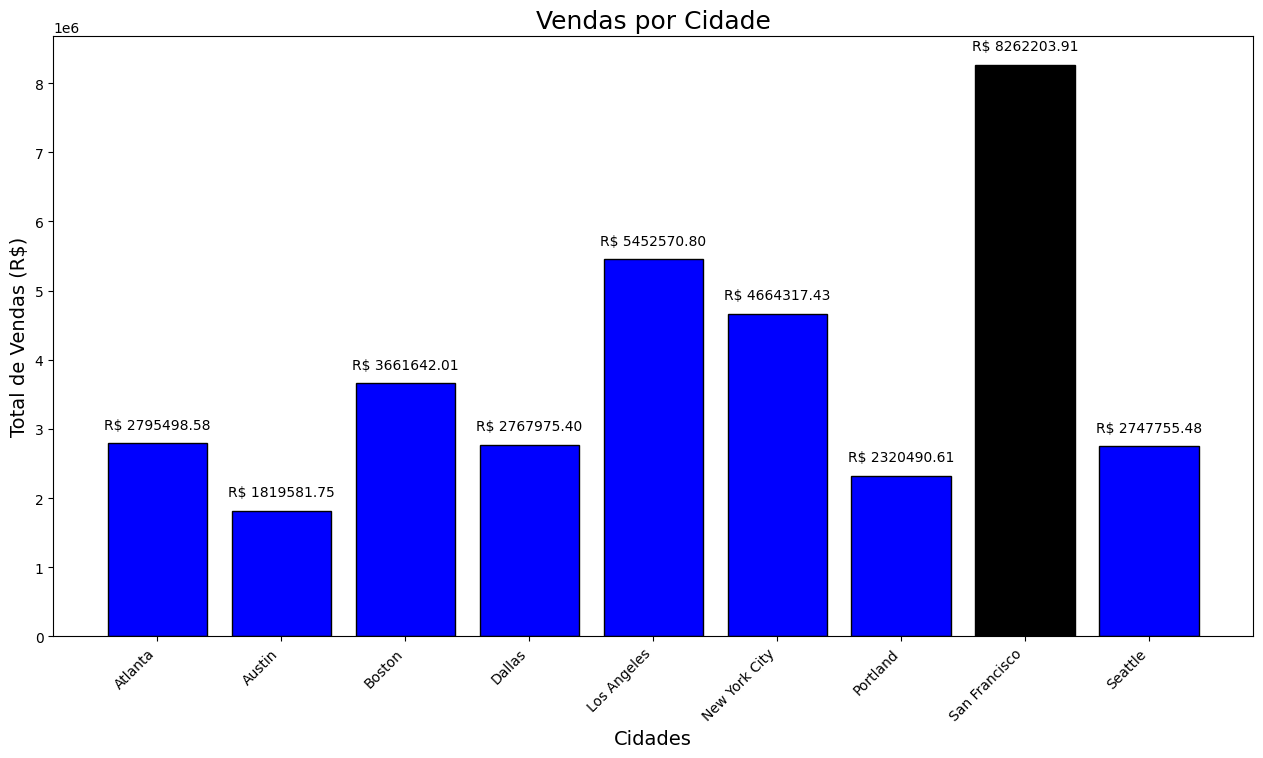

In [8]:
# Criando uma coluna para isolar a cidade.
db['City']= db['Purchase Address'].apply(lambda x: x.split(",")[1].strip())

# Agrupando por cidade e somando as vendas
cidade_consumo = db.groupby('City')['Total Sales'].sum()

# Criando uma figura.
fig = plt.figure(figsize=(12, 6))

# Criando os eixos.
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando um filtro de cores
cor = ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'k', 'b']

# Passando os dados para o gráfico. No caso declarando quem será meu x e meu y.
eixo.bar(cidade_consumo.index, cidade_consumo, color=cor, edgecolor='black')

# Configurações do gráfico.
eixo.set_title('Vendas por Cidade', fontsize=18)
eixo.set_xlabel('Cidades', fontsize=14)
eixo.set_ylabel('Total de Vendas (R$)', fontsize=14)
eixo.set_xticks(cidade_consumo.index)
eixo.set_xticklabels(cidade_consumo.index, rotation=45, ha='right', fontsize=10)

# Adicionando os valores no topo das barras
for i, v in enumerate(cidade_consumo):
    eixo.text(i, v + max(cidade_consumo) * 0.02, f'R$ {v:.2f}', ha='center', va='bottom', fontsize=10)

# Mostrando o gráfico.
plt.show()

### Q3: A que horas devemos exibir o anúncio para maximizar a probabilidade de o cliente comprar o produto?

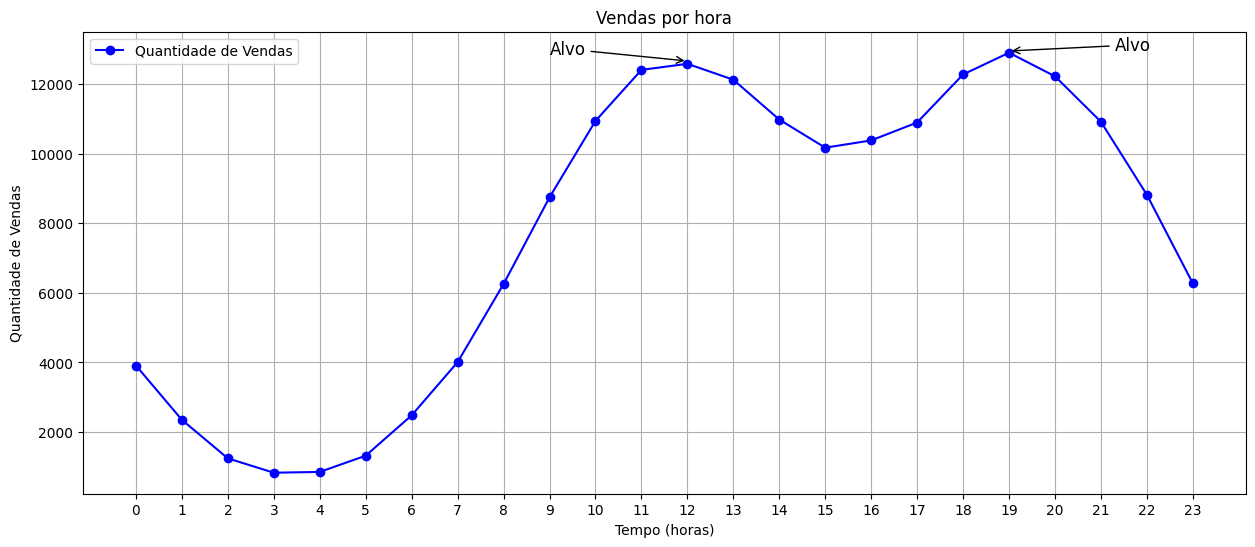

In [9]:
# Criando uma coluna com a hora da compra
db['Hour'] = db['Order Date'].dt.hour

# Calculando o número de vendas por hora e ordenando as horas.
vendas_por_hora = db['Hour'].value_counts().sort_index()

# Criando as variáveis x e y.
horas = vendas_por_hora.index
quantidade_vendas = vendas_por_hora.values

# Criando uma visualização com estilo de linha e fundo quadriculado
plt.figure(figsize=(15, 6))
plt.plot(horas, quantidade_vendas, marker='o', linestyle='-', color='b', label='Quantidade de Vendas')
plt.grid(True)  # Adiciona o fundo quadriculado

# Adicionando título e rótulos dos eixos
plt.title('Vendas por hora')
plt.xlabel('Tempo (horas)')
plt.ylabel('Quantidade de Vendas')

# Adicionando seta e texto para a primeira barra preta.
primeira_barra_x = horas[12]
primeira_barra_y = quantidade_vendas[12] + 80
plt.annotate('Alvo', xy=(primeira_barra_x, primeira_barra_y), xytext=(primeira_barra_x - 3, primeira_barra_y + 200),
              arrowprops=dict(arrowstyle='->', color='black'), fontsize=12, color='black')

# Adicionando seta e texto para a terceira barra preta.
terceira_barra_x = horas[19]
terceira_barra_y = quantidade_vendas[19] + 50
plt.annotate('Alvo', xy=(terceira_barra_x, terceira_barra_y), xytext=(terceira_barra_x + 2.3, terceira_barra_y + 30),
              arrowprops=dict(arrowstyle='->', color='black'), fontsize=12, color='black')

# Definindo os ticks para cada hora
plt.xticks(np.arange(0, 24, step=1))

# Mostrando o gráfico
plt.legend(loc= 'upper left')
plt.show()


#### R: Por não saber o público alvo do marketing, o horário indicado para propagandas é o horario com maior atividade dos clientes, portanto 12h e 19h.

### Q4: Quais produtos são frequentemente vendidos juntos? Quantas unidades são vendidas ?

In [10]:
# Como precisamos fazer associações de itens, será necessário novas bibliotecas.
from itertools import combinations
from collections import Counter

# Agrupando Products em função do Order Id saberemos quais produos são comprados juntos.
grouped = db.groupby('Order ID')['Product'].apply(list).reset_index()  #Isso cria uma lista dos produtos associados a esse número de pedido.

# Realizando as combinações para cada grupo de pedido.
grouped['Product Combinations'] = grouped['Product'].apply(lambda x: list(combinations(x, 2))) # a função lambda é uma função genérica anônima.

#Contando a frequencia dos produtos combinados
comb_t = Counter([tuple(sorted(comb)) for sublist in grouped['Product Combinations'] for comb in sublist])

# Exibir as combinações de produtos mais comuns
top = comb_t.most_common(1)

for combination, count in top:
    print(f' R: Os itens mais vendidos em conjuntos são {combination}, com um total de {count} pedidos.')

 R: Os itens mais vendidos em conjuntos são ('Lightning Charging Cable', 'iPhone'), com um total de 1015 pedidos.


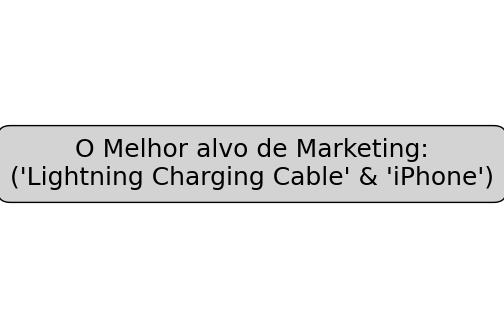

In [11]:

# Frase desejada
frase = "O Melhor alvo de Marketing:\n('Lightning Charging Cable' & 'iPhone')"

# Criando a figura
fig, ax = plt.subplots(figsize=(6, 4))

# Adicionando a frase como texto
ax.text(0.5, 0.5, frase, ha='center', va='center', fontsize=18, color='black', bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'))

# Removendo os eixos
ax.axis('off')

# Exibindo a imagem
plt.show()

### Q5: Qual produto vendeu mais? Por que você acha que vendeu mais?

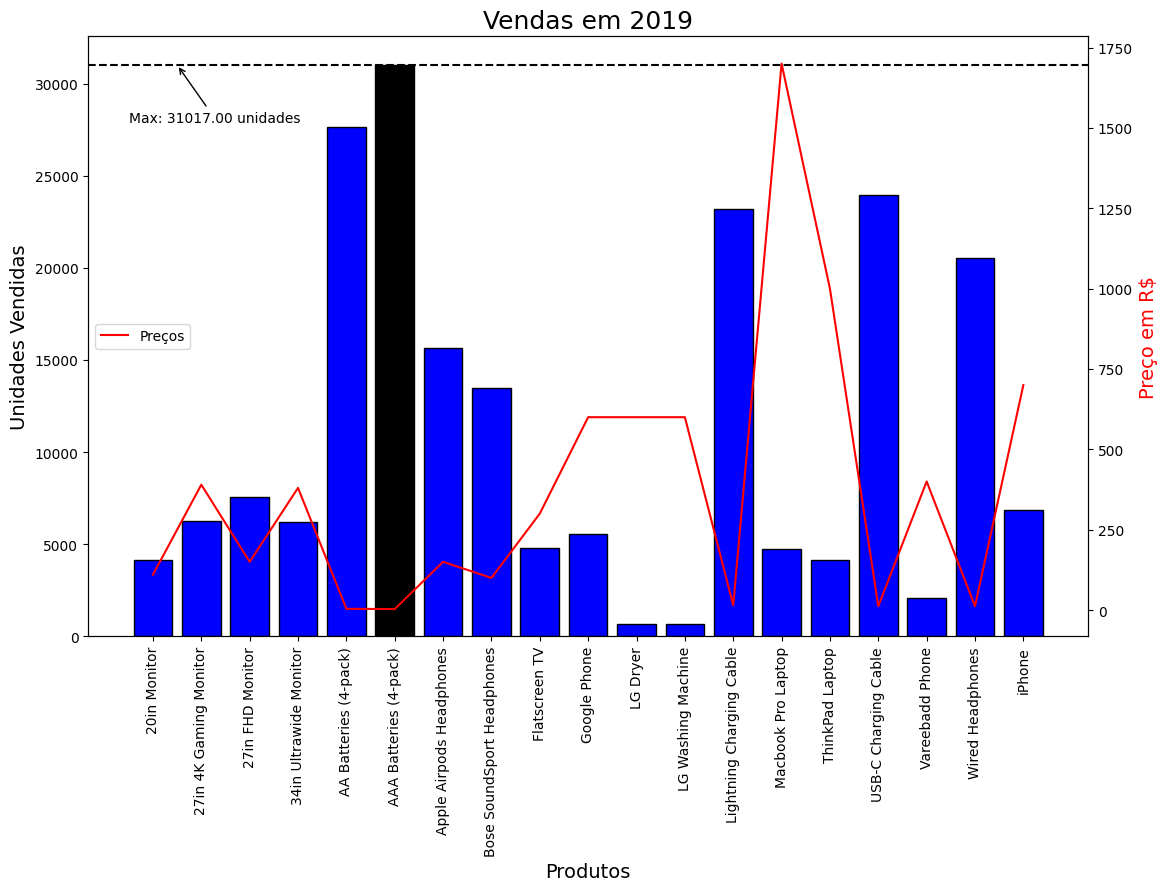

In [12]:
# Criando uma figura.
fig = plt.figure(figsize=(10,6))

# Criando os eixos.
eixo = fig.add_axes([0, 0, 1, 1])

# Criando um par ordenado x,y
mais_vendidos = db.groupby('Product')
produtos = [produto for produto, db in mais_vendidos] # lsitar os itens
top= mais_vendidos['Quantity Ordered'].sum()
precos= db.groupby('Product')['Price Each'].mean()

# Adicionando um filtro de cores
cor = ['b', 'b', 'b', 'b', 'b', 'k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

# Passando os dados para os gráficos. No caso declarando quem será meu x e meu y.
eixo.bar(produtos, top, color = cor, edgecolor = 'black')
eixo.set_xticks(produtos)
eixo.set_xticklabels( produtos,  rotation = 'vertical', fontsize =10)

eixo2 = eixo.twinx()
eixo2.plot(produtos,precos,'r-', label='Preços')

#Configurações do gráfico.
eixo.set_title('Vendas em 2019', fontsize = 18)
eixo.set_xlabel('Produtos', fontsize = 14)
eixo.set_ylabel('Unidades Vendidas', fontsize = 14)
eixo2.set_ylabel('Preço em R$', color = 'r', fontsize = 14)
eixo2.legend(loc = 'center left')

# Criando uma linha visualizadora.
eixo.axhline(max(top), color = 'black', ls = '--')

# Adicionando o valor máximo no eixo y como texto.
valor_maximo = max(top)
eixo.annotate(f'Max: {valor_maximo:.2f} unidades', xy=(0.5, valor_maximo), xytext=(- 0.5, valor_maximo * 0.9),
              arrowprops=dict(arrowstyle='->', color='black'))

# Mostrando o gráfico.
plt.show()

In [13]:
# Para a segunda parte da resposta existem diversas formas de se análisar as causas de um produto ser mais vendido. Por simplicidade, irei supor que seja em função do menor preço.

# Localizando o produto que apresenta o menor preço no dataframe.
produto_menor_preco = db.loc[db['Price Each'].idxmin()]['Product']

# Menor preço de toda dataframe
preco_menor = db['Price Each'].min()

# Resposta formal
print(f'R: O produto {produto_menor_preco} é o mais vendido, pois apresenta o menor preço da loja, sendo este de "R$" {preco_menor:.2f}.')

R: O produto AAA Batteries (4-pack) é o mais vendido, pois apresenta o menor preço da loja, sendo este de "R$" 2.99.


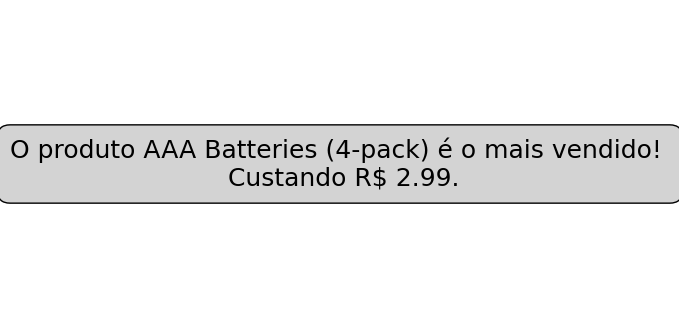

In [14]:
# Frase desejada
frase = "O produto AAA Batteries (4-pack) é o mais vendido! \n Custando R$ 2.99."

# Criando a figura
fig, ax = plt.subplots(figsize=(6, 4))

# Adicionando a frase como texto
ax.text(0.5, 0.5, frase, ha='center', va='center', fontsize=18, color='black', bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'))

# Removendo os eixos
ax.axis('off')

# Exibindo a imagem
plt.show()

# 3º Parte: Análise Preditiva.

### Q1: Qual a probabilidade do proxímo cliente pedir USB-C Charging Cable?

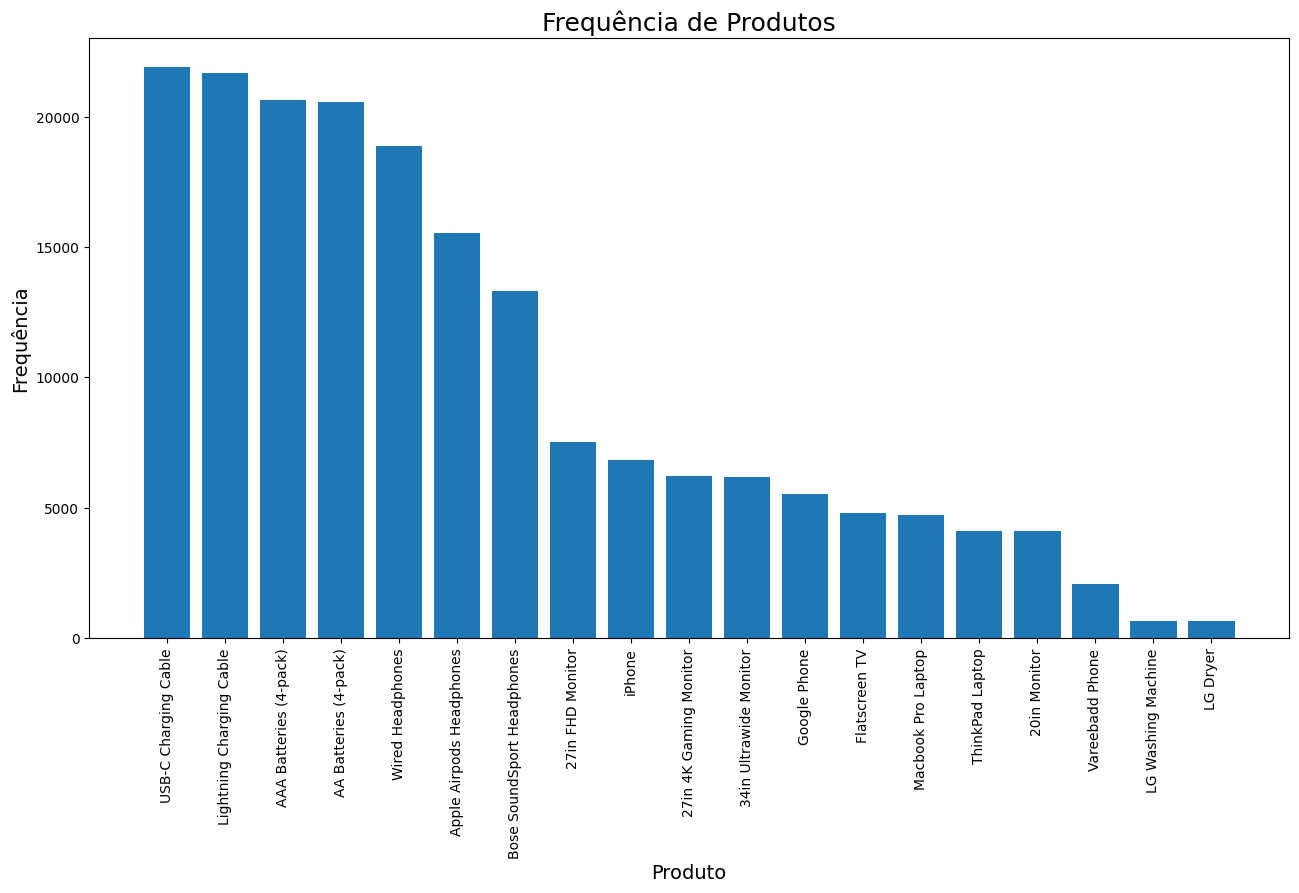

In [15]:
# Criando uma figura para visualizar a distribuição de frquência dos produtos.
fig = plt.figure(figsize= (12,6))

# Declarando o eixo
eixo = fig.add_axes([0, 0, 1, 1])

# Criando x,y
freq_prod = db['Product'].value_counts()


# Fornecendo os dados e rotacionando os rótulos em 90 graus
eixo.bar(freq_prod.index, freq_prod.values)
eixo.set_xticks(freq_prod.index)
eixo.set_xticklabels(freq_prod.index, rotation=90)

# Configurações
eixo.set_title('Frequência de Produtos', fontsize=18)
eixo.set_xlabel('Produto', fontsize=14)
eixo.set_ylabel('Frequência', fontsize=14)

plt.show()

In [16]:
# Contando quantas vezes o 'USB-C Charging Cable' foi pedido
qtd_usb_c = len(db[db['Product'] == 'USB-C Charging Cable'])

# Número total de pedidos
total_pedidos = len(db)

# Calculando a probabilidade
probabilidade_usb_c = (qtd_usb_c / total_pedidos) * 100

# Arredondando para 2 casas decimais
probabilidade_arredondada = round(probabilidade_usb_c, 2)

# Mostrando como percentual
print(f'Probabilidade de pedir USB-C Charging Cable: {probabilidade_arredondada:.2f}%')

Probabilidade de pedir USB-C Charging Cable: 11.78%


### Q2: Qual a probabilidade do proxímo cliente pedir iPhone?

In [17]:
# Contando quantas vezes o iPhone foi pedido
qtd_ip = len(db[db['Product'] == 'iPhone'])

# Número total de pedidos
total_pedidos = len(db)

# Calculando a probabilidade
probabilidade_iphone = (qtd_ip / total_pedidos) * 100

# Arredondando para 2 casas decimais
probabilidade_arredondada = round(probabilidade_iphone, 2)

# Mostrando como percentual
print(f'Probabilidade de pedir iPhone: {probabilidade_arredondada:.2f}%')

Probabilidade de pedir iPhone: 3.68%


### Q3: Qual a probabilidade do proxímo cliente pedir Google Phone?

In [18]:
# Contando quantas vezes o 'Google Phone' foi pedido
qtd_google_phone = len(db[db['Product'] == 'Google Phone'])

# Número total de pedidos
total_pedidos = len(db)

# Calculando a probabilidade
probabilidade_google_phone = (qtd_google_phone / total_pedidos) * 100

# Arredondando para 2 casas decimais
probabilidade_arredondada = round(probabilidade_google_phone, 2)

# Mostrando como percentual
print(f'Probabilidade de pedir Google Phone: {probabilidade_arredondada:.2f}%')

Probabilidade de pedir Google Phone: 2.97%


### Q4: Qual a probabilidade do proxímo cliente pedir Wired Headphones?

In [19]:
# Contando quantas vezes o 'Wired Headphones' foi pedido
qtd_wh = len(db[db['Product'] == 'Wired Headphones'])

# Número total de pedidos
total_pedidos = len(db)

# Calculando a probabilidade
probabilidade_wh = (qtd_wh / total_pedidos) * 100

# Arredondando para 2 casas decimais
probabilidade_arredondada = round(probabilidade_wh, 2)

# Mostrando como percentual
print(f'Probabilidade de pedir Wired Headphones: {probabilidade_arredondada:.2f}%')

Probabilidade de pedir Wired Headphones: 10.15%


## Por fim é interessante verificar se existe alguma correlação sginificativa, visando a produção de algum modelo de machine learning futura.

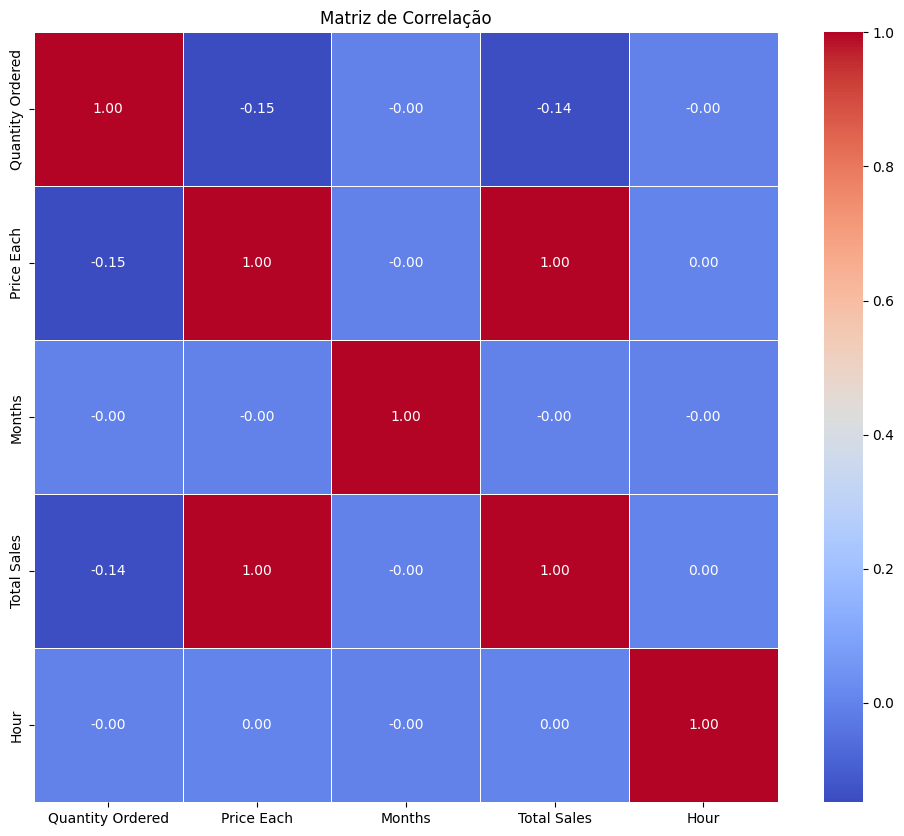

In [20]:
# Eliminando as colunas 'Order ID' e 'Order Date', 'Purchase Address', 'City', 'Product'
db = db.drop(columns=['Order ID', 'Order Date', 'Purchase Address', 'City', 'Product'])

# Matriz de Correlação
correlation_matrix = db.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # apresentando um mapa de calor, facilitando a visualização.
plt.title('Matriz de Correlação')
plt.show()

### Uma vez que a matriz de correlação não apresenta valores significativos e este é um estudo exploratório, não foi necessário a criação de algum modelo para o projeto.